<a href="https://colab.research.google.com/github/KaanKirant/SentimentAnalysis/blob/main/Sentiment_Analysis_on_Internet_Comments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the libaries that are going to be used.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import gdown
from collections import namedtuple

Download the dataset from Google Drive. Thşs sectşon of the code is to make sure that program runs on different systems.

In [ ]:
url = 'https://drive.google.com/file/d/1VCn-hGiMU_H_qP02JlOPLQJtpWVWvXHe/view?usp=share_link'
file_id = url.split('/')[-2]
download_link = 'https://drive.google.com/uc?/export=download&id=' + file_id
gdown.download(download_link)
!unzip -o 'dataset.zip'
!rm 'dataset.zip'

Downloading...
From: https://drive.google.com/uc?/export=download&id=1VCn-hGiMU_H_qP02JlOPLQJtpWVWvXHe
To: /content/dataset.zip
100%|██████████| 82.3k/82.3k [00:00<00:00, 16.8MB/s]

Archive:  dataset.zip
  inflating: amazon_cells_labelled.txt  
  inflating: imdb_labelled.txt       
  inflating: yelp_labelled.txt       


Creating DataFrame

There is data from three different websites. These datas are combined together.

In [ ]:
def create_dataframe():
  Item = namedtuple('Comment', 'Label')
  items = []
  with open('amazon_cells_labelled.txt') as file:
    for line in file:
      l = line.rstrip('\n')
      if l.endswith('1'):
        label = 1
      else:            
        label = 0
      new_line = l[:-1]
      items.append([new_line, label])
  with open('imdb_labelled.txt') as file:
    for line in file:
      l = line.rstrip('\n')
      if l.endswith('1'):
        label = 1
      else:            
        label = 0
      new_line = l[:-1]
      items.append([new_line, label])
  with open('yelp_labelled.txt') as file:
    for line in file:
      l = line.rstrip('\n')
      if l.endswith('1'):
        label = 1
      else:            
        label = 0
      new_line = l[:-1]
      items.append([new_line, label])


  df = pd.DataFrame.from_records(items, columns=['Comment', 'Label'])
  return df

In [ ]:
df = create_dataframe().sample(frac=1)
df.head()

,Comment,Label
295,This is hands down the best phone I've ever ha...,1
1021,"In other words, the content level of this film...",1
2937,Don't bother coming here.\t,0
107,I love my 350 headset.. My Jabra350 bluetooth ...,1
2993,the presentation of the food was awful.\t,0


Checking the number of values in the 'Label' class.

In [ ]:
df['Label'].value_counts()

1    1500
0    1500
Name: Label, dtype: int64

Cheking the null instances in both of the classes.

In [ ]:
df.isnull().sum()

Comment    0
Label      0
dtype: int64

Splitting the classes.

In [ ]:
x = df['Comment']
y = df['Label']

Split the data to Train/Test Data

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 0)

Using Count Vectorizer

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer_cv = CountVectorizer(stop_words='english')
cv_train = vectorizer_cv.fit_transform(x_train)
cv_test = vectorizer_cv.transform(x_test)

Using Machine Learning Models. Vectorizer is Count Vectorizer

Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay

log_reg_classifier = LogisticRegression()
log_reg_classifier = log_reg_classifier.fit(cv_train, y_train)

y_pred_logReg = log_reg_classifier.predict(cv_test)

accuracy = accuracy_score(y_test, y_pred_logReg)
print("Accuracy of Logistic Regression using Count Vectorizer is : " ,round(accuracy,4)*100, "%\n")

print(classification_report(y_test,y_pred_logReg))
print("Confusion Matrix:")
print(confusion_matrix(y_test,y_pred_logReg))

Accuracy of Logistic Regression using Count Vectorizer is :  80.0 %

              precision    recall  f1-score   support

           0       0.78      0.85      0.82       311
           1       0.82      0.74      0.78       289

    accuracy                           0.80       600
   macro avg       0.80      0.80      0.80       600
weighted avg       0.80      0.80      0.80       600

Confusion Matrix:
[[265  46]
 [ 74 215]]


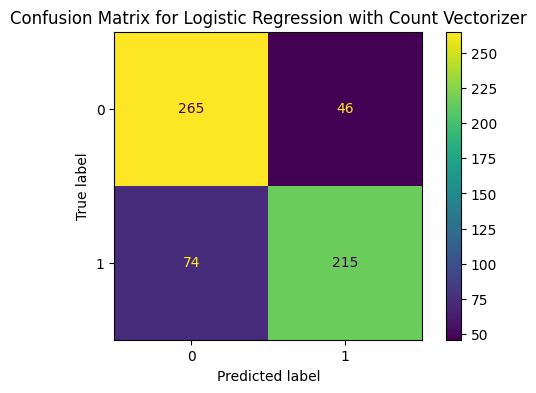

In [ ]:
fig, ax = plt.subplots(figsize=(6,4), dpi=100)
display = ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred_logReg), display_labels=log_reg_classifier.classes_)
ax.set(title='Confusion Matrix for Logistic Regression with Count Vectorizer')
display.plot(ax=ax);

Random Forest Classifiers

In [ ]:
from sklearn.ensemble import RandomForestClassifier

random_forest_classifier = RandomForestClassifier(n_estimators=200, random_state=0)
random_forest_classifier.fit(cv_train, y_train)

y_pred_RF = random_forest_classifier.predict(cv_test)

accuracy = accuracy_score(y_test, y_pred_RF)
print("Accuracy of Logistic Regression using Count Vectorizer is : " ,round(accuracy,4)*100, "%\n")

print(classification_report(y_test,y_pred_RF))
print("Confusion Matrix:")
print(confusion_matrix(y_test,y_pred_RF))

Accuracy of Logistic Regression using Count Vectorizer is :  77.33 %

              precision    recall  f1-score   support

           0       0.75      0.84      0.79       311
           1       0.80      0.70      0.75       289

    accuracy                           0.77       600
   macro avg       0.78      0.77      0.77       600
weighted avg       0.78      0.77      0.77       600

Confusion Matrix:
[[261  50]
 [ 86 203]]


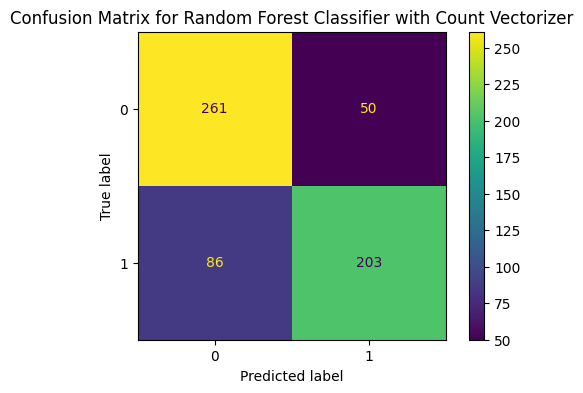

In [ ]:
fig, ax = plt.subplots(figsize=(6,4), dpi=100)
display = ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred_RF), display_labels=log_reg_classifier.classes_)
ax.set(title='Confusion Matrix for Random Forest Classifier with Count Vectorizer')
display.plot(ax=ax);

Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

NB_classifier = GaussianNB()
cv_train_NB = cv_train.toarray()
cv_test_NB = cv_test.toarray()
NB_classifier.fit(cv_train_NB, y_train)

y_pred_NB = NB_classifier.predict(cv_test_NB)

accuracy = accuracy_score(y_test, y_pred_NB)
print("Accuracy of Logistic Regression using Count Vectorizer is : " ,round(accuracy,4)*100, "%\n")

print(classification_report(y_test,y_pred_NB))
print("Confusion Matrix:")
print(confusion_matrix(y_test,y_pred_NB))

Accuracy of Logistic Regression using Count Vectorizer is :  62.17 %

              precision    recall  f1-score   support

           0       0.60      0.83      0.70       311
           1       0.69      0.39      0.50       289

    accuracy                           0.62       600
   macro avg       0.64      0.61      0.60       600
weighted avg       0.64      0.62      0.60       600

Confusion Matrix:
[[259  52]
 [175 114]]


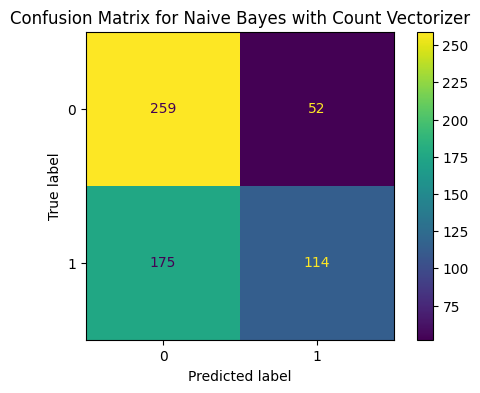

In [ ]:
fig, ax = plt.subplots(figsize=(6,4), dpi=100)
display = ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred_NB), display_labels=log_reg_classifier.classes_)
ax.set(title='Confusion Matrix for Naive Bayes with Count Vectorizer')
display.plot(ax=ax);

Using TFIDFVectorizer

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer_tfidf = TfidfVectorizer(stop_words='english')
tfidf_train = vectorizer_tfidf.fit_transform(x_train)
tfidf_test = vectorizer_tfidf.transform(x_test)

Logistic Regression

In [ ]:
tfidf_log_reg_classifier = LogisticRegression()
log_reg_classifier = log_reg_classifier.fit(tfidf_train, y_train)

y_pred_logReg_tfidf = log_reg_classifier.predict(tfidf_test)

accuracy = accuracy_score(y_test, y_pred_logReg_tfidf)

print("Accuracy of Logistic Regression using Count Vectorizer is : " ,round(accuracy,4)*100, "%\n")

print(classification_report(y_test,y_pred_logReg_tfidf))
print("Confusion Matrix:")
print(confusion_matrix(y_test,y_pred_logReg_tfidf))

Accuracy of Logistic Regression using Count Vectorizer is :  81.0 %

              precision    recall  f1-score   support

           0       0.80      0.84      0.82       311
           1       0.82      0.78      0.80       289

    accuracy                           0.81       600
   macro avg       0.81      0.81      0.81       600
weighted avg       0.81      0.81      0.81       600

Confusion Matrix:
[[260  51]
 [ 63 226]]


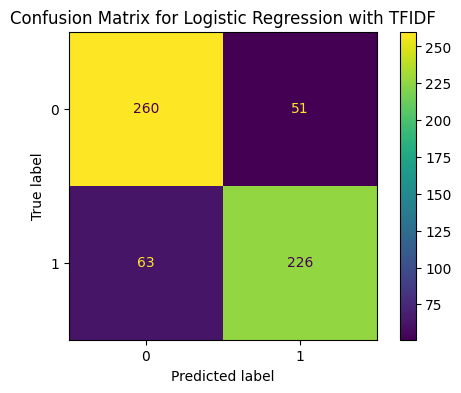

In [ ]:
fig, ax = plt.subplots(figsize=(6,4), dpi=100)
display = ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred_logReg_tfidf), display_labels=log_reg_classifier.classes_)
ax.set(title='Confusion Matrix for Logistic Regression with TFIDF')
display.plot(ax=ax);

Random Forest Classifier

In [ ]:
random_forest_classifier_tfidf = RandomForestClassifier(n_estimators=200, random_state=0)
random_forest_classifier_tfidf.fit(tfidf_train, y_train)

y_pred_RF_tfidf = random_forest_classifier_tfidf.predict(tfidf_test)

accuracy = accuracy_score(y_test, y_pred_RF_tfidf)

print("Accuracy of Logistic Regression using Count Vectorizer is : " ,round(accuracy,4)*100, "%\n")

print(classification_report(y_test,y_pred_RF_tfidf))
print("Confusion Matrix:")
print(confusion_matrix(y_test,y_pred_RF_tfidf))

Accuracy of Logistic Regression using Count Vectorizer is :  77.5 %

              precision    recall  f1-score   support

           0       0.76      0.84      0.79       311
           1       0.80      0.71      0.75       289

    accuracy                           0.78       600
   macro avg       0.78      0.77      0.77       600
weighted avg       0.78      0.78      0.77       600

Confusion Matrix:
[[260  51]
 [ 84 205]]


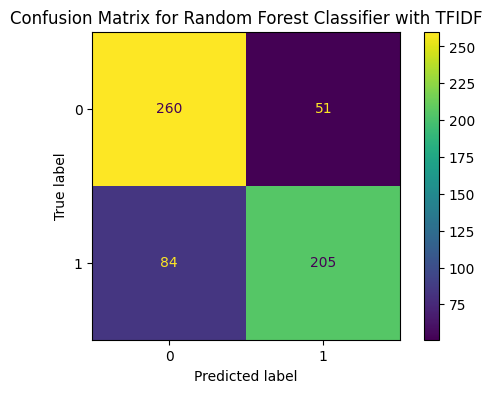

In [ ]:
fig, ax = plt.subplots(figsize=(6,4), dpi=100)
display = ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred_RF_tfidf), display_labels=log_reg_classifier.classes_)
ax.set(title='Confusion Matrix for Random Forest Classifier with TFIDF')
display.plot(ax=ax);

Naive Bayes

In [ ]:
NB_classifier_tfidf = GaussianNB()
tfidf_train_NB_tfidf = tfidf_train.toarray()
tfidf_test_NB_tfidf = tfidf_test.toarray()
NB_classifier_tfidf.fit(tfidf_train_NB_tfidf, y_train)

y_pred_NB_tfidf = NB_classifier_tfidf.predict(tfidf_test_NB_tfidf)

accuracy = accuracy_score(y_test, y_pred_NB_tfidf)

print("Accuracy of Logistic Regression using Count Vectorizer is : " ,round(accuracy,4)*100, "%\n")

print(classification_report(y_test,y_pred_NB_tfidf))
print("Confusion Matrix:")
print(confusion_matrix(y_test,y_pred_NB_tfidf))

Accuracy of Logistic Regression using Count Vectorizer is :  64.83 %

              precision    recall  f1-score   support

           0       0.63      0.77      0.69       311
           1       0.67      0.52      0.59       289

    accuracy                           0.65       600
   macro avg       0.65      0.64      0.64       600
weighted avg       0.65      0.65      0.64       600

Confusion Matrix:
[[238  73]
 [138 151]]


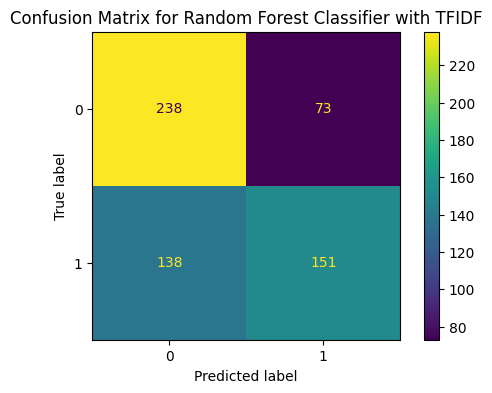

In [ ]:
fig, ax = plt.subplots(figsize=(6,4), dpi=100)
display = ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred_NB_tfidf), display_labels=log_reg_classifier.classes_)
ax.set(title='Confusion Matrix for Random Forest Classifier with TFIDF')
display.plot(ax=ax);